# Data Preprocessing

## Imputation
You will often find yourself in a situation where you will be dealing with an incomplete dataset.  There are many reasons why data may be missing: survey responses may have been optional, there may have been some sort of data recording error, or the information may simply just not be available.  There are a plethora of ways to handle such situations, several of which we will explore in this exercise.

1. Go do the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) and download the [Beijing PM2.5 Data](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data), put it into a dataframe, giving the columns the proper names.  Also be sure to familarize yourself with the data set before proceeding.
1. Suppose our data became corrupted after we downloaded it and values were missing.  Randomly insert 5000 `NaN` into the dataset accross all the columns.
1.  Which variables lend themselves to be in a regression model?  Select those variables, and then fit a regression model for each of the following imputation strategies, commenting on your results.
    - Dropping all rows with at least 1 NA
    - Dropping all rows with at least 3 NA
    - Imputing 0
    - Mean
    - Median
    - Mode
1. Given the results in part (3), and your own ingenuity, come up with a new imputation strategy and try it out.  Comment on your results.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
% matplotlib inline

In [54]:
# 1.
bpd = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
bpd.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)
bpd.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [45]:
bpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB


In [107]:
# 2.
random.seed(0)
randList = []
bpdNa = bpd.copy()

for _ in range(5000):
    col = random.randint(0,7)
    row = random.randint(1,len(bpd))
    bpdNa.iloc[row, col] = np.nan

In [160]:
def multLinReg(df):
    lm = LinearRegression()

    X = df.drop('pm2.5', axis=1)
    y = df['pm2.5']

    lm.fit(X, y)
    print(f"r2 = {lm.score(X, y)}")
    print(f"mean squared error = {mean_squared_error(y, lm.predict(X))}")

In [58]:
# 3.
# using all columns that have non-categorical, non-binary data
# drop all rows with at least 1 NA
dataPt1 = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']].dropna()

lm = LinearRegression()

X = dataPt1.drop('pm2.5', axis=1)
y = dataPt1['pm2.5']

lm.fit(X, y)
print(f"r2 = {lm.score(X, y)}")
print(f"mean squared error = {mean_squared_error(y, lm.predict(X))}")

r2 = 0.2244152899159749
mean squared error = 6553.929625925547


In [60]:
# drop rows with at least 3 NA
dataPt2 = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']].dropna(thresh=3)

lm = LinearRegression()

X = dataPt1.drop('pm2.5', axis=1)
y = dataPt1['pm2.5']

lm.fit(X, y)
print(f"r2 = {lm.score(X, y)}")
print(f"mean squared error = {mean_squared_error(y, lm.predict(X))}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [64]:
# imputing 0 for NaNs
dataPt3 = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']].fillna(0)

lm = LinearRegression()

X = dataPt3.drop('pm2.5', axis=1)
y = dataPt3['pm2.5']

lm.fit(X, y)
print(f"r2 = {lm.score(X, y)}")
print(f"mean squared error = {mean_squared_error(y, lm.predict(X))}")

r2 = 0.17055361273454628
mean squared error = 7050.075490517768


In [67]:
# imputing mean for NaNs
dataPt4 = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']].fillna(bpdNa.mean())

lm = LinearRegression()

X = dataPt4.drop('pm2.5', axis=1)
y = dataPt4['pm2.5']

lm.fit(X, y)
print(f"r2 = {lm.score(X, y)}")
print(f"mean squared error = {mean_squared_error(y, lm.predict(X))}")

r2 = 0.19610148684201745
mean squared error = 6391.933172835538


In [71]:
# imputing median for NaNs
dataPt5 = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']].fillna(bpdNa.median())

lm = LinearRegression()

X = dataPt5.drop('pm2.5', axis=1)
y = dataPt5['pm2.5']

lm.fit(X, y)
print(f"r2 = {lm.score(X, y)}")
print(f"mean squared error = {mean_squared_error(y, lm.predict(X))}")

r2 = 0.1950498251138234
mean squared error = 6432.392472664963


In [73]:
# imputing mode for NaNs
dataPt6 = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']].fillna(bpdNa.mode().iloc[0])

lm = LinearRegression()

X = dataPt6.drop('pm2.5', axis=1)
y = dataPt6['pm2.5']

lm.fit(X, y)
print(f"r2 = {lm.score(X, y)}")
print(f"mean squared error = {mean_squared_error(y, lm.predict(X))}")

r2 = 0.17677509078480047
mean squared error = 6862.495946702779


MSE is lowest for the mean imputation method, but r2 is highest for dropping all NaNs. Seems to make sense to combine them in some way

In [108]:
lmData = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']]
lmData = lmData[pd.notnull(bpdNa['pm2.5'])]
lmData = lmData.fillna(lmData.mean())

lm = LinearRegression()

X = lmData.drop('pm2.5', axis=1)
y = lmData['pm2.5']

lm.fit(X, y)
print(f"r2 for dropping pm2.5 NaNs = {lm.score(X, y)}")
print(f"mean squared error for dropping pm2.5 NaNs = {mean_squared_error(y, lm.predict(X))}")

r2 for dropping pm2.5 NaNs = 0.21024793174043876
mean squared error for dropping pm2.5 NaNs = 6695.587907555551


In [109]:
lmData2 = bpdNa[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']]
lmData2['pm2.5'] = lmData2['pm2.5'].fillna(lmData2['pm2.5'].mean())
lmData2 = lmData2.dropna()

lm = LinearRegression()

X = lmData2.drop('pm2.5', axis=1)
y = lmData2['pm2.5']

lm.fit(X, y)
print(f"r2 for imputing pm2.5 mean = {lm.score(X, y)}")
print(f"mean squared error for imputing pm2.5 mean = {mean_squared_error(y, lm.predict(X))}")

r2 for imputing pm2.5 mean = 0.21133137717828723
mean squared error for imputing pm2.5 mean = 6286.50011122515


/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Dropping the NaNs from the dependent variables and imputting the mean on the independent variable seems to have given the best result of MSE and r2

## Categorical Data
Sometimes your data will contain categorical variables which need to be handled carefully depending on the machine learning algorithm you choose to use.  Encoding categorical variables comes in two flavors: oridinal (ordered) and nominal (unordered) features.  In this exercise, you'll further explore the Beijing PM2.5 dataset, this time using categorical variables.

1. Which variables are categorical?  Encode them properly, taking care to insure that they are properly classified as either ordinal or nominal.
1. Perform a multilinear regression, using the classified data, removing the `NA` values.  Comment on your results.
1. Create a new encoding for days in which it rained, snowed, neither, and both, and then rerun the regression.  Are the results any better?
1. Create a new encoding for the quartile that a day falls under by wind speed and rerun the regression.  Comment on your results.
1. Create a new encoding for deciles of the `DEWP` variable.  Then select the row containing the highest temperature, and using `Pandas` `category` data type, select all rows in a lesser `DEWP` decile than this row.

In [111]:
# 1.
bpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 8 columns):
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.7+ MB


cdwd is the only categorical variable, and as wind direction has no inherent order, it's an ordinal variable

In [163]:
# 2.
catData = bpd.copy()

dummies = pd.get_dummies(catData['cbwd'])
catData = catData.join(dummies).drop('cbwd', axis=1)
catData.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0


In [165]:
catData = catData.dropna()

multLinReg(catData)

r2 = 0.2605655420307925
mean squared error = 6265.280560951087


Results are better than when not using categorical data

In [166]:
# 2.
catData['yr'] = np.where(catData['Ir'] != 0, 1, 0)
catData['ys'] = np.where(catData['Is'] != 0, 1, 0)
catData['nrns'] = np.where((catData['Is'] == 0) & (catData['Is'] == 0), 1, 0)
catData['yrys'] = np.where((catData['Is'] != 0) & (catData['Is'] != 0), 1, 0)
multLinReg(catData)

r2 = 0.2615373538508471
mean squared error = 6257.046330534219


Eh, about the same results as before. Slightly better r2 and MSE but not significant

In [157]:
# 4.
quartiles = list(bpd['Iws'].describe().iloc[4:7].values)

In [169]:
def assignQuartile(x):
    if x < quartiles[0]:
        return '1st'
    if x < quartiles[1]:
        return '2nd'
    if x < quartiles[2]:
        return '3rd'
    return '4th'

catData['wind_quart'] = catData['Iws'].apply(lambda x: assignQuartile(x))
dummies = pd.get_dummies(catData['wind_quart'])
catData = catData.join(dummies).drop('wind_quart', axis=1)
catData.head()

multLinReg(catData)

r2 = 0.26835890324200895
mean squared error = 6199.246859147137


Better than any other results

In [175]:
# 5.
decile = list(np.percentile(catData['DEWP'], range(10,110,10)))
decString = ['1st', '2nd', '3rd', '4th', '5th' ,'6th', '7th', '8th', '9th', '10th']

def assignDecile(x):
    for num in decile:
        if x <= num:
            return decString[decile.index(num)]

catData['DewpDec'] = catData['DEWP'].apply(lambda x: assignDecile(x))

In [191]:
catData['DewpDec'] = pd.Categorical(catData['DewpDec'], categories=decString, ordered=True)
catDataDewp = catData[catData['DewpDec'] < catData[catData['TEMP'] == catData['TEMP'].max()]['DewpDec'].values]
catDataDewp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21400 entries, 24 to 43823
Data columns (total 20 columns):
pm2.5      21400 non-null float64
DEWP       21400 non-null int64
TEMP       21400 non-null float64
PRES       21400 non-null float64
Iws        21400 non-null float64
Is         21400 non-null int64
Ir         21400 non-null int64
NE         21400 non-null uint8
NW         21400 non-null uint8
SE         21400 non-null uint8
cv         21400 non-null uint8
yr         21400 non-null int64
ys         21400 non-null int64
nrns       21400 non-null int64
yrys       21400 non-null int64
1st        21400 non-null uint8
2nd        21400 non-null uint8
3rd        21400 non-null uint8
4th        21400 non-null uint8
DewpDec    21400 non-null category
dtypes: category(1), float64(4), int64(7), uint8(8)
memory usage: 2.1 MB


## Feature Scaling
Many of the machine learning algorithms we have at our disposal require that the feautures be on the the same scale in order to work properly.  In this exercise, you'll test out a few techniques with and without feature scaling and observe the outcomes.

1. Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Wine Dataset](http://archive.ics.uci.edu/ml/datasets/Wine), and put it in a dataframe, being sure to label the columns properly.
1. Fit a Nearest Neighbors model to the data, using a normalized data set, a stardardized data set, and the original.  Split into test and train sets and compute the accuracy of the classifications and comment on your results.
1. Fit a Naive Bayes model to the data, using a normalized data set, a standardized data set, and the original.  Comment on your results.

In [204]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [203]:
# 1.
wine = pd.read_csv('wine.data')
wine.columns=['class', 'alcohol', 'malicAcid', 'ash', 'ashAlc', 'mg', 'phenols', 'flavanoids', 'nonFlavPhenols', 
              'proanthocyanins', 'colorIntensity', 'hue', 'od280Od315', 'proline']
wine.head()

,class,alcohol,malicAcid,ash,ashAlc,mg,phenols,flavanoids,nonFlavPhenols,proanthocyanins,colorIntensity,hue,od280Od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [209]:
# 2.
X = wine.drop('class', axis=1)
y = wine['class']
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1)

mms = MinMaxScaler()
ss = StandardScaler()

NormXTrain = mms.fit_transform(XTrain)
NormXTest = mms.fit_transform(XTest)

StdXTrain = ss.fit_transform(XTrain)
StdXTest = ss.fit_transform(XTest)

In [212]:
orig_score = 0
norm_score = 0
std_score = 0
for x in range(1,7):
    kn = KNeighborsClassifier(n_neighbors=x)
    kn.fit(XTrain, yTrain)
    if kn.score(XTest, yTest) > orig_score:
        orig_score = round(kn.score(XTest, yTest),3)
        
    kn.fit(NormXTrain, yTrain)
    if kn.score(NormXTest, yTest) > norm_score:
        norm_score = round(kn.score(NormXTest, yTest),3)
        
    kn.fit(StdXTrain, yTrain)
    if kn.score(StdXTest, yTest) > std_score:
        std_score = round(kn.score(StdXTest, yTest),3)
        
print(f"The best Original dataset's fit score is {orig_score}")
print(f"The best Normed dataset's fit score is {norm_score}")
print(f"The best Standardized dataset's fit score is {std_score}")

The best Original dataset's fit score is 0.778
The best Normed dataset's fit score is 0.917
The best Standardized dataset's fit score is 0.944


In [213]:
# 3.
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(XTrain, yTrain)
print(f"The best Original dataset's Naive Bayes fit score is {round(nb.score(XTest, yTest),3)}")
nb.fit(NormXTrain, yTrain)
print(f"The best Normed dataset's Naive Bayes fit score is {round(nb.score(NormXTest, yTest),3)}")
nb.fit(StdXTrain, yTrain)
print(f"The best Standardized dataset's Naive Bayes fit score is {round(nb.score(StdXTest, yTest),3)}")

The best Original dataset's Naive Bayes fit score is 0.944
The best Normed dataset's Naive Bayes fit score is 0.917
The best Standardized dataset's Naive Bayes fit score is 0.917


## Feature Selection
With many datasets, you will find yourself in a situation where not all of the provided features are relevant to your model and it may be best to discard them.  This is a very complex topic, involving many techniques, a few of which we will explore in this exercise, using the `Boston` housing data.

1. From sklearn import the `load_boston` package, and put the data into a data frame with the proper column names, and then split into training and testing sets.
1. Fit a series of least squares multilinear regression models to the data, and use the F-Statistic to select the K best features for values of `k` ranging from `1` to the total number of features.  Plot the MSE for each model against the test set and print the best features for each iteration.  Comment on your results.
1. Do the same as in part (2) instead this time using recursive feature selection.
1. Fit a Ridge Regression model to the data and use recursive feature elimination and `SelectFromModel` in `sklearn` to select your features.  Generate the same plots and best features as in parts (2) and (3) and comment and compare your results to what you have found previously.
1. L1 regularization can also be used for model selection.  Choose an algorithm in `sklearn` and repeat part (4) using model selection via regularization.

In [214]:
from sklearn.datasets import load_boston

In [219]:
boston = load_boston()
X = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)
X.columns = boston.feature_names

In [234]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1)

In [279]:
from sklearn.feature_selection import f_regression, SelectKBest
from itertools import compress

feature_length = list(range(1, len(X.columns)+1))

skbMseList = []
skbBestFeatures = []
for features in feature_length:
    # skb works by fit_transforming the X and y datasets using f_regression, then using those transformed datasets as
    # input to the linear regression model
    skb = SelectKBest(f_regression, k=features)
    
    XTrainTemp = skb.fit_transform(XTrain, yTrain.values.ravel())
    XTestTemp = skb.transform(XTest)
    
    lm = LinearRegression(normalize = True)
    lm.fit(XTrainTemp, yTrain)
    
    skbMseList.append(mean_squared_error(yTest, lm.predict(XTestTemp)))
    # get_support returns a boolean list of the features used for the select K Best model
    
    skbBestFeatures.append(list(compress(list(boston.feature_names),skb.get_support())))

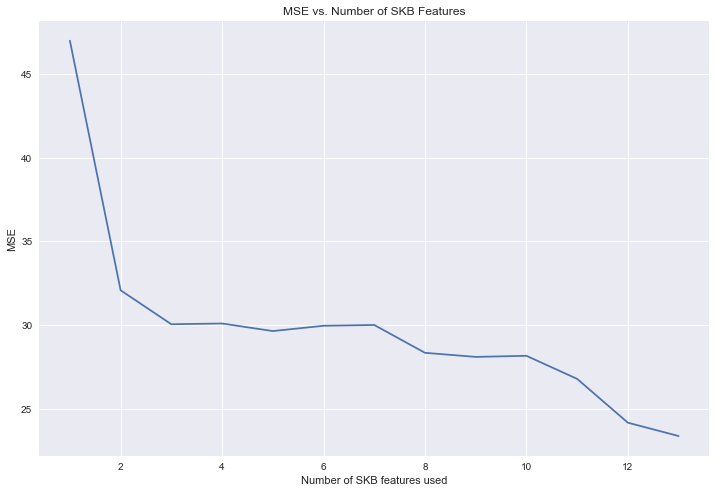

['LSTAT']
['RM', 'LSTAT']
['RM', 'PTRATIO', 'LSTAT']
['INDUS', 'RM', 'PTRATIO', 'LSTAT']
['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [277]:
plt.figure(figsize=(12,8))
plt.plot(feature_length, skbMseList)
plt.xlabel('Number of SKB features used')
plt.ylabel('MSE')
plt.title('MSE vs. Number of SKB Features')
plt.show()
for feats in skbBestFeatures:
    print(str(feats))

The lowest error is when you use all 13 features

In [273]:
from sklearn.feature_selection import RFE

feature_length = list(range(1, len(X.columns)+1))

rfeMseList = []
rfeBestFeatures = []
for features in feature_length:
    # skb works by fit_transforming the X and y datasets using f_regression, then using those transformed datasets as
    # input to the linear regression model
    lm = LinearRegression(normalize = True)
    rfe = RFE(lm, features)
    
    XTrainTemp = rfe.fit_transform(XTrain, yTrain.values.ravel())
    XTestTemp = rfe.transform(XTest)
    
    lm.fit(XTrainTemp, yTrain)
    
    rfeMseList.append(mean_squared_error(yTest, lm.predict(XTestTemp)))
    # get_support returns a boolean list of the features used for the select K Best model
    
    rfeBestFeatures.append(list(compress(list(boston.feature_names),rfe.get_support())))

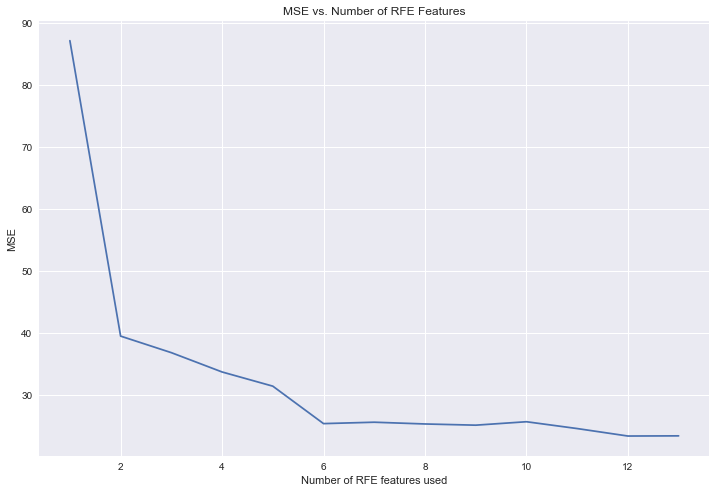

['NOX']
['NOX', 'RM']
['CHAS', 'NOX', 'RM']
['CHAS', 'NOX', 'RM', 'PTRATIO']
['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO']
['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [278]:
plt.figure(figsize=(12,8))
plt.plot(feature_length, rfeMseList)
plt.xlabel('Number of RFE features used')
plt.ylabel('MSE')
plt.title('MSE vs. Number of RFE Features')
plt.show()
for feats in rfeBestFeatures:
    print(str(feats))

In [284]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel


sfmMseList = []
sfmBestFeatures = []
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
    
    
for thresh in range(0.2,.99,0.1):
    # skb works by fit_transforming the X and y datasets using f_regression, then using those transformed datasets as
    # input to the linear regression model
    rm = Ridge(normalize=True)
    sfm = SelectFromModel(rm, threshold=thresh)

    XTrainTemp = sfm.fit_transform(XTrain, yTrain.values.ravel())
    XTestTemp = sfm.transform(XTest)

    lm.fit(XTrainTemp, yTrain)

    print(mean_squared_error(yTest, lm.predict(XTestTemp)))
    # get_support returns a boolean list of the features used for the select K Best model

    print(list(compress(list(boston.feature_names),sfm.get_support())))
    

# plt.figure(figsize=(12,8))
# plt.plot(feature_length, sfmMseList)
# plt.xlabel('Number of SFM features used')
# plt.ylabel('MSE')
# plt.title('MSE vs. Number of SFM Features')
# plt.show()
for feats in sfmBestFeatures:
    print(str(feats))

25.3520865852
['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
